In [3]:
import pandas as pd
import numpy as np
import scipy.stats 

In [6]:
df = pd.read_csv('./shared_bicycles.csv')
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [ ]:
#categorical variable

In [11]:
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x: 'Cat-'+str(int(x)))
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [25]:
values = ycat.unique()
freq_count = ycat.value_counts().values
freq_table = dict(zip(values,freq_count))
freq_table

{'Cat-3': 4394, 'Cat-0': 4387, 'Cat-1': 4330, 'Cat-2': 4303}

In [29]:
# Numerical  variable
ynum =  df['viento'].copy()
print(ynum.min())
print(ynum.max())


0.0
56.5


In [34]:
# Percentiles
print(np.percentile(ynum, q = 50))
print(np.median(ynum))

15.0
15.0


In [36]:
#Quartiles
values = [0,25,50,75,100]
np.percentile(ynum, q = values)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [38]:
values = [0,20,40,60,80,100]
np.percentile(ynum, q = values)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [40]:
values = list(range(0,110,10))
np.percentile(ynum, q = values)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [43]:
y = df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [50]:
#outliers
Q1 = np.percentile(ynum, q = 25)
Q3 = np.percentile(ynum, q = 75)
IR = Q3 - Q1 
upper_limit = Q1  - 1.5* IR
lower_limit = Q3 + 1.5 * IR 
(upper_limit, lower_limit)

(-5.75, 36.25)

In [51]:
#Plotting
import matplotlib.pyplot as plt
%matplotlib inline

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

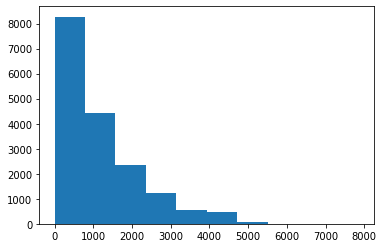

In [52]:
plt.hist(y)